In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.integrate as integrate

In [2]:
%matplotlib nbagg
%load_ext autoreload
%autoreload 2

In [3]:
def iterate_euler(dx, dt, T, state, *args, **kwargs):
    t = np.double(0.0)
    while t < T:
        yield state
        nxt = dx(t, state, *args, **kwargs)
        state = state + dt*nxt
        t += dt
        
def iterate_scipy_ode(dx, dt, T, state, *args):
    t0 = 0
    r = integrate.ode(dx).set_integrator('dopri5')
    r.set_initial_value(state, t0).set_f_params(*args)
    while r.successful() and r.t < T: 
        yield r.integrate(r.t+dt)   

In [4]:
_min = np.minimum
_max = np.maximum
def dydt(t, y):
    return np.array([np.cos(t), np.cos(t+0.5*np.pi) + 0.01], dtype=np.float64)

def dydt_coupled(t, y, phase_offset):
    theta1 = np.arcsin(_max(_min(y[0],1.0), -1.0))
    theta2 = np.arcsin(_max(_min(y[1],1.0), -1.0))
    return np.array([np.cos(t),
                     np.cos(t + phase_offset - (theta1 - theta2) )],
                    dtype=np.float64)

<IPython.core.display.Javascript object>


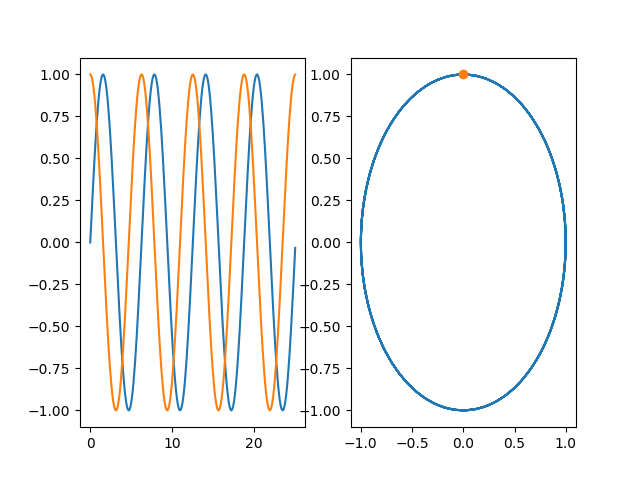

In [11]:
x = np.arange(0,8*np.pi,0.1)
y1 = np.sin(x)
y2 = np.sin(x+0.5*np.pi)
plt.figure()
plt.subplot(1,2,1)
plt.plot(x, y1)
plt.plot(x, y2)
plt.subplot(1,2,2)
plt.plot(y1,y2)
plt.plot(y1[0], y2[0], 'o')

In [6]:
T = 16*np.pi
dt = np.double(0.01)
y0 = np.array([0.0,1.0], dtype=np.float64)
ys = np.array([y for y in iterate_scipy_ode(dydt_coupled, dt, T, y0, 0.5*np.pi)])

<IPython.core.display.Javascript object>


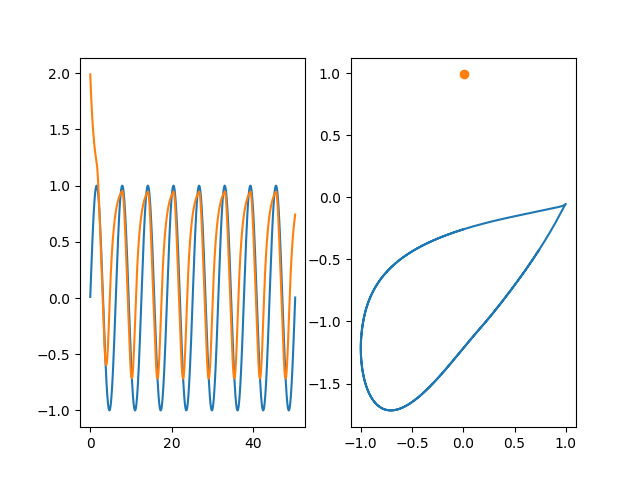

In [7]:
t = np.arange(0,T,dt)
plt.figure()
plt.subplot(1,2,1)
plt.plot(t, ys[:,0])
plt.plot(t, ys[:,1]+1)
plt.subplot(1,2,2)
start = 4000
plt.plot(ys[start:,0],ys[start:,1])
plt.plot(ys[0,0],ys[0,1], 'o')

In [54]:
def bvp(t, s, a, b, c, I, tau):
    x, y = s
    dxdt = x - np.power(x,3)/3.0 - y + I
    dydt = (x - b*y + a) * c
    return np.array([dxdt, dydt]) / tau

In [82]:
dt = 0.03
s0 = np.random.rand(2)
a = 0.7
b = 0.8
c = 0.08
tau = 0.1
I = 1.4
orbit = np.array([s for s in iterate_scipy_ode(bvp, dt, 10, s0, a, b, c, I, tau)])

<IPython.core.display.Javascript object>


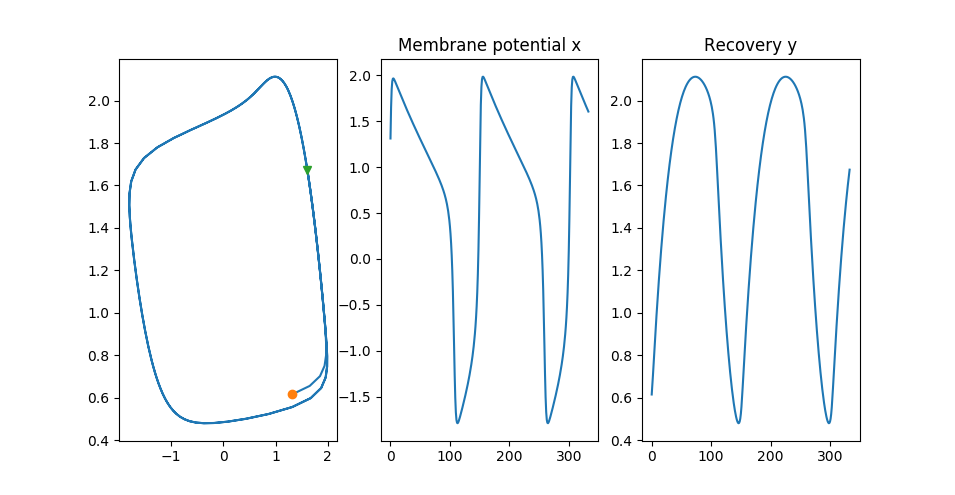

In [83]:
plt.figure()
plt.subplot(1,3,1)
plt.plot(orbit[:,0], orbit[:,1])
plt.plot(orbit[0,0], orbit[0,1], 'o')
plt.plot(orbit[-1,0], orbit[-1,1], 'v')

plt.subplot(1,3,2)
plt.plot(orbit[:,0])
plt.title('Membrane potential x')

plt.subplot(1,3,3)
plt.plot(orbit[:,1])
plt.title('Recovery y')

<IPython.core.display.Javascript object>


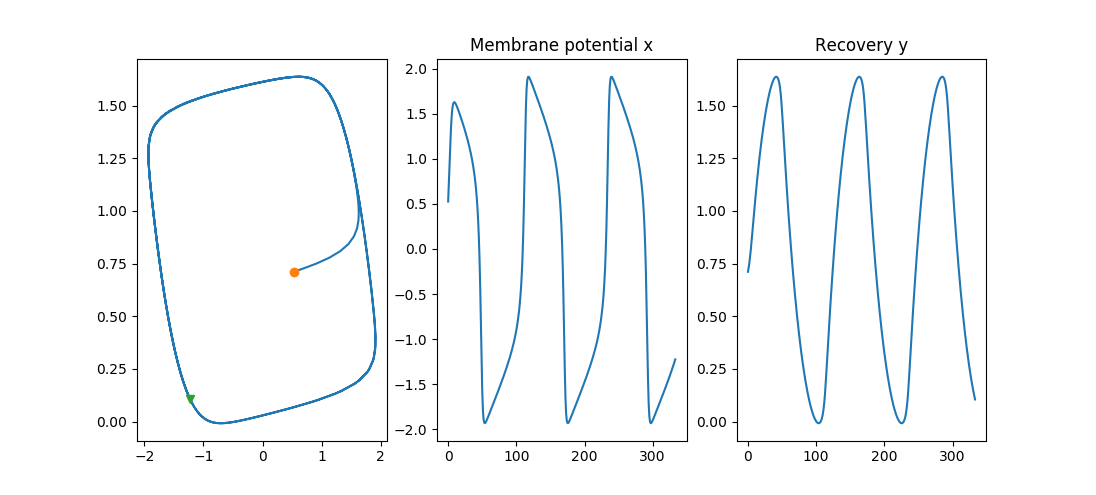

In [75]:
plt.figure()
plt.subplot(1,3,1)
plt.plot(orbit[:,0], orbit[:,1])
plt.plot(orbit[0,0], orbit[0,1], 'o')
plt.plot(orbit[-1,0], orbit[-1,1], 'v')

plt.subplot(1,3,2)
plt.plot(orbit[:,0])
plt.title('Membrane potential x')

plt.subplot(1,3,3)
plt.plot(orbit[:,1])
plt.title('Recovery y')